In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Dropping categorical features

In [4]:
df_modified = df.drop(["sex","smoker","region"], axis = 1)

In [5]:
df_modified

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


### The objective of this notebook is to use various Normalization techniques and chech the accuracy score

In [6]:
target = df_modified["charges"]
df_modified.drop("charges", axis = 1, inplace = True)

In [7]:
df_modified

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


C:\Users\subho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='bmi'>

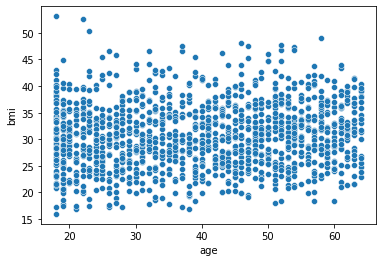

In [8]:
color_palette = ["red","green","blue"]
sns.scatterplot(df_modified["age"],df_modified["bmi"], palette = {0:"red",1:"green"})

In [9]:
target = pd.DataFrame(target)

In [10]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_modified, target,test_size = 0.3, random_state = 0)

In [12]:
X_train

,age,bmi,children
1163,18,28.215,0
196,39,32.800,0
438,52,46.750,5
183,44,26.410,0
1298,33,27.455,2
...,...,...,...
763,27,26.030,0
835,42,35.970,2
1216,40,25.080,0
559,19,35.530,0


In [13]:
np.round(df_modified.describe(), 1)

,age,bmi,children
count,1338.0,1338.0,1338.0
mean,39.2,30.7,1.1
std,14.0,6.1,1.2
min,18.0,16.0,0.0
25%,27.0,26.3,0.0
50%,39.0,30.4,1.0
75%,51.0,34.7,2.0
max,64.0,53.1,5.0


In [14]:
## There are no null values in the above dataset

# Min Max Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [16]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = X_train.columns)

In [17]:
X_train_transformed.head()
X_test_transformed.head()

,age,bmi,children
0,0.739130,0.383105,0.2
1,0.630435,0.360775,0.2
2,0.652174,0.661959,0.4
3,0.934783,0.603175,0.0
4,0.717391,0.056228,0.0


## Let us visualize the transformation

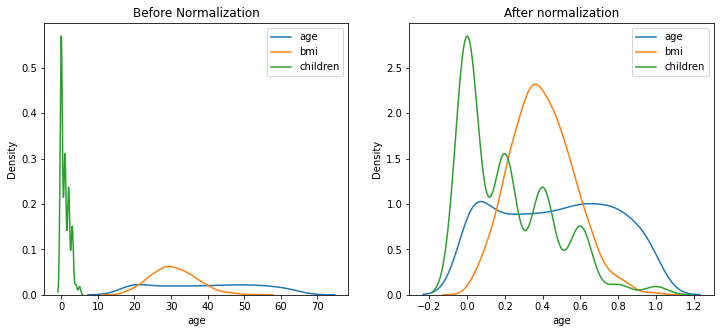

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

sns.kdeplot(X_train["age"], ax = ax1, label = "age")
sns.kdeplot(X_train["bmi"], ax = ax1, label = "bmi")
sns.kdeplot(X_train["children"], ax = ax1, label = "children")
ax1.set_title("Before Normalization")
ax1.legend()
sns.kdeplot(X_train_transformed["age"], ax = ax2, label = "age")
sns.kdeplot(X_train_transformed["bmi"], ax = ax2, label = "bmi")
sns.kdeplot(X_train_transformed["children"], ax = ax2, label = "children")
ax2.set_title("After normalization")
ax2.legend()
plt.show()

### From the above visualization we can conclude that normalization doesnt affect the shape of the distribution, it only makes all the features comparable to each other


### Linear Regreesion Model

In [20]:
from sklearn.linear_model import LinearRegression

alg1 = LinearRegression()
alg1_unscaled = LinearRegression()
alg1.fit(X_train_transformed, Y_train_transformed)
alg1_unscaled.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_predicted = alg1.predict(X_test_transformed)
Y_predicted_unscaled = alg1_unscaled.predict(X_test)

In [32]:
Y_predicted[0:5:1], Y_predicted_unscaled[0:5:1]

(array([[15773.10883603],
        [14442.0164168 ],
        [18422.47773096],
        [19490.26947957],
        [11521.19155525]]),
 array([[15773.10883603],
        [14442.0164168 ],
        [18422.47773096],
        [19490.26947957],
        [11521.19155525]]))

### Lets check the accuracy for both scaled and unscaled data

In [26]:
score_test_unscaled = alg1_unscaled.score(X_test,Y_test)
score_test = alg1.score(X_test_transformed, Y_test)
print(score_test_unscaled)
print(score_test)

0.1497412806492574
0.14974128064925762


In [30]:
alg1.coef_

array([[10075.53951222, 10565.46416718,  2896.40862291]])

In [31]:
alg1_unscaled.coef_

array([[219.03346766, 284.24708548, 579.28172458]])

# Max Absolute Scaling

In [36]:
from sklearn.preprocessing import MaxAbsScaler

scaler1 = MaxAbsScaler()

scaler1.fit(X_train)

X_train_transform = scaler1.transform(X_train)
X_test_transform =scaler1.transform(X_test)

In [38]:
X_train_transform = pd.DataFrame(X_train_transform, columns = X_train.columns)

X_test_transform = pd.DataFrame(X_test_transform, columns = X_train.columns)

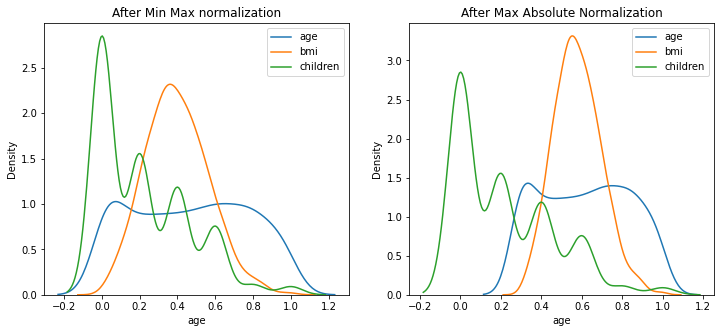

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# After min max scaling

sns.kdeplot(X_train_transformed["age"], ax = ax1, label = "age")
sns.kdeplot(X_train_transformed["bmi"], ax = ax1, label = "bmi")
sns.kdeplot(X_train_transformed["children"], ax = ax1, label = "children")
ax1.set_title("After Min Max normalization")
ax1.legend()


# After Max Absolute Scaling
sns.kdeplot(X_train_transform["age"], ax = ax2, label = "age")
sns.kdeplot(X_train_transform["bmi"], ax = ax2, label = "bmi")
sns.kdeplot(X_train_transform["children"], ax = ax2, label = "children")
ax2.set_title("After Max Absolute Normalization")
ax2.legend()
plt.show()

### From the above visualization we can observe some slight changes